# Identify working and data directory and site ID.
* The working directory is the root directory of the github.
* The data directory points to the google drive folder where the larger data files are stored.
* For the moment the site ID if the four-digit NEON site ID.

In [68]:
working<-"~/neon_suna"
working_data<-"/Users/jhosen/gdrive/SUNA_Data/"
site_id<-"LIRO"
#data<-paste("~/gdrive/SUNA_Data/SUNA_NEON/",site_id,"/2019",sep="")
data<-paste(working_data,"/SUNA_NEON/LIRO_2020/",sep="")

save<-paste(working_data,"/corrected_files/",sep="")

# Initialize required libraries, functions and formatting utilities.

In [69]:
library(dplyr)
library(streamMetabolizer)
library(splitstackshape)
library(ggplot2)
library(lubridate)
library(reshape2)
library(neonUtilities)
library(progress)
library(patchwork)
library(doBy)
library(stringr)
#library(box)

theme_ts_space<-theme_grey() +
		theme(
#		panel.grid.major = element_blank(),
#		panel.grid.minor = element_blank(),
		panel.background = element_rect(fill="white", colour="black", size=2),
#		legend.key       = element_blank(),
#		legend.text      = element_text(size=20.5),
#		legend.text      = element_blank(),
#		legend.title     = element_text(size=20.5),
		axis.text.x = element_text(size=22,colour="black",hjust=1,angle=45),
		axis.text.y = element_text(size=22,colour="black",vjust=.3),
		axis.title.x = element_text(size=22),
		axis.title.y = element_text(size=22,vjust=-1),
#		plot.title = element_text(hjust = 0.5,size=22,face="bold"),		
#		legend.position  = "left",
		legend.position  = "none",
		plot.margin = unit(c(1,1,1,1), "cm"),
		panel.border = element_rect(colour = "black", fill=NA, size=2)
		)





# Setting up the workspace
In the cell below indicate the site that will be analyzed here according to its NEON 4-letter code. A list of files for that site is then placed in the vector "sunas".

If you downloaded the repo into your home director, which is found by going to "~/", then you don"t have to change the box path. FYI: Box is a new package for R that allows you to define a set of functions without creating a new package.

In [75]:

#setwd(paste("~/gdrive/SUNA_data/SUNA_NEON/",site_id,sep=""))
#sunas<-list.files(pattern="*.csv")
#getwd()
#options(box.path = "~/neon_suna/box/")
#box::use(plots)

setwd(data)
sunas<-list.files(pattern="*.CSV")

#suna_cal<-readRDS("/Users/jhosen/gdrive/fdom/SUNA Calibration pdfs/suna_cal_comb.rds")
#suna_cal<-read.csv("/Users/jhosen/gdrive/SUNA_Data/SUNA Calibration pdfs/suna_0839_20200312.csv")
#suna_cal_t<-as.data.frame(t(suna_cal))
#names(suna_cal_t)<-suna_cal_t[1,]

# Data import and processing loop.
This step loads each data file, formats the data for use, and concatenates files from an individual site.

This step could take a while.

In [10]:
paste("/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/LIRO_2020/cal_files/",cal,"_abbr.csv",sep="")

[1] "/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/LIRO_2019/cal_files/SNA1073H_abbr.csv"

In [82]:
cal
paste("/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/LIRO_2020/cal_files/",cal,"_abbr.csv",sep="")
sunas[i]

[1] "SNA0639D"

[1] "/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/LIRO_2020/cal_files/SNA0639D_abbr.csv"

[1] "D2020163.CSV"

In [83]:
options(warn=-1)
compiled_suna<-data.frame()
sunas_length<-length(sunas)
for(i in 1:sunas_length){
#i<-1
print(i)


suna_calid<-read.csv(paste(sunas[i]),skip=0,header=FALSE)
cal<-str_extract(suna_calid,"[SNA]{3}[0-9]{4}[a-zA-Z]{1}")
cal<-cal[!is.na(cal)]
    
    
suna<-read.csv(paste(sunas[i]),skip=30,header=FALSE)

if(cal!="SNA0639C" & cal!="SNA0639D" & cal!="SNA0639F"){suna_cal<-read.csv(paste("/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/LIRO_2020/cal_files/",cal,"_abbr.csv",sep=""))}else{
    suna_cal<-read.csv("/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/LIRO_2020/CAL_files/SNA0639E_abbr.csv")}



    
    
suna_cal_t<-as.data.frame(t(suna_cal))
names(suna_cal_t)<-suna_cal_t[1,]

#suna_d0<-cSplit(suna,3, ",")
names(suna)<-c("suna_id","date","time","nitrate","nitrate_mgl","a254","a350","bromide_trace","spec_average_dark","dark_signal_average","int_time",suna_cal$wavelength_nm,"sensor_temp","spec_temp","lamp_temp","lamp_time","rel_hum","main_volt","lamp_volt","int_volt","main_current","fit_aux_1","fit_aux_2","fit_base_1","fit_base_2","fit_RMSE","CTD_Time","CTD_Salinity","CTD_Temp","CTD_Pressure","checksum")

    
#suna<-subset(suna,a254!=0)

suna<-subset(suna,a254!=0)
    
#year<-substr(suna$date, 1, 4)
if(grepl("D2019",sunas[i])==TRUE){
year<-"2019"
doy<-gsub(".CSV","",gsub("D2019","",paste(sunas[i]),fixed=TRUE),fixed=TRUE)
}
    
if(grepl("D2020",sunas[i])==TRUE){
year<-"2020"
doy<-gsub(".CSV","",gsub("D2020","",paste(sunas[i]),fixed=TRUE),fixed=TRUE)
}

day<-as.POSIXct(paste(as.Date(as.numeric(doy)-1,origin=paste(year,"-01-01",sep="")),"00:00:00"),tz="UTC")
#suna$day<-as.POSIXct("2019-05-10 00:00:00",tz="UTC")
suna$dtp<-day + (3600*as.numeric(suna$time))
#attr(suna$dtp,"tzone") <- "Etc/GMT+8"

    

offse<-c(t(suna_cal_t[3,]))
suna2<-(suna[,12:267]/suna$int_time)-suna$dark_signal_average
suna_d0_norm<-sweep(suna2,2,FUN="/",offse)
names(suna_d0_norm)<-paste("n_",names(suna_cal_t),sep="")

    

#print("test")
suna_d0_int<-data.frame()
for(j in 1:nrow(suna_d0_norm)){	
#    print(j)
    if(!is.na(suna_d0_norm[j,1])){
	flip<-as.data.frame(t(suna_d0_norm[j,]))
	names(flip)<-c("abs")
	flip$wl_nm<-gsub("n_","",row.names(flip),fixed=TRUE)
	flip_int<-as.data.frame(t(approx(flip$wl_nm,flip$abs,xout=seq(189,394,1),rule=2)$y))
	names(flip_int)<-paste("interp_",seq(189,394,1),sep="")
	suna_d0_int<-bind_rows(suna_d0_int,flip_int)
    }else{
        flip_int[1,]<-NA
       	suna_d0_int<-bind_rows(suna_d0_int,flip_int)
    }
}
suna_d<-bind_cols(suna,suna_d0_int)
#suna_d$date<-as.character(suna_d[,c("date")])
#suna_d$time<-as.character(suna_d[,c("time")])
suna_d2<-suna_d %>% mutate_if(is.numeric,as.character)
compiled_suna<-bind_rows(compiled_suna,suna_d2)
}
print("done")
options(warn=0)    
    
    
    


[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] "done"


# Check Data and Save

In [84]:
#head(compiled_suna)
#grepl("D2020",sunas[240])
#sunas[240]
#length(sunas)
#sunas[240]
#ncol(compiled_suna)
#nrow(compiled_suna)
#names(compiled_suna)<-gsub("inter_time","int_time",names(compiled_suna),fixed=TRUE)
#saveRDS(compiled_suna,"/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/LIRO_2020/LIRO_corrected/SUNA_LIRO_20210428_full.rds")
saveRDS(compiled_suna,paste(save,"/SUNA_Cor/","SUNA_LIRO_2020_20210701_full.rds",sep=""))
#compiled_suna<-readRDS("/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/LIRO_2020/LIRO_corrected/SUNA_LIRO_20210428_full.rds")


# Extracting the interpolated columns

In [85]:
compiled_suna$cal<-"SNA1073"

suna_interp<-compiled_suna[,grepl("^inter",names(compiled_suna))] %>% mutate_if(is.character, ~as.numeric(.))
#head(suna_interp)

other_suna<-compiled_suna[,c("suna_id","date","time","nitrate","nitrate_mgl","a254","a350","bromide_trace","spec_average_dark","dark_signal_average","int_time","sensor_temp","spec_temp","lamp_temp","lamp_time","rel_hum","main_volt","lamp_volt","int_volt","main_current","fit_aux_1","fit_aux_2","fit_base_1","fit_base_2","fit_RMSE","CTD_Time","CTD_Salinity","CTD_Temp","CTD_Pressure","checksum","cal","dtp")]

suna_cols<-bind_cols(other_suna,suna_interp)
suna_cols$a254<-as.numeric(suna_cols$a254)
suna_cols$a350<-as.numeric(suna_cols$a350)
suna_cols$nitrate<-as.numeric(suna_cols$nitrate)
suna_cols$nitrate_mgl<-as.numeric(suna_cols$nitrate_mgl)
suna_cols$sensor_temp<-as.numeric(suna_cols$sensor_temp)


In [ ]:
range(suna_cols$a254)
range(suna_cols$interp_254)
suna_cols$interp_254
names(suna_cols)

In [86]:
suna_cols<-subset(suna_cols,a350<10 & a254<10)
a350_mod<-lm(a350~log10(interp_350)+I(log10(interp_350)^2)+I(log10(interp_350)^3),suna_cols)
a254_mod<-lm(a254~log10(interp_254+0.6)+I(log10(interp_254+0.6)^2)+I(log10(interp_254+0.6)^3),suna_cols)



cor_cols<-grep("^interp_",names(suna_cols))


Warning message in eval(predvars, data, env):
“NaNs produced”
Warning message in unique.default(c("AsIs", oldClass(x))):
“NaNs produced”
Warning message in unique.default(c("AsIs", oldClass(x))):
“NaNs produced”



Call:
lm(formula = a254 ~ log10(interp_254 + 0.6) + I(log10(interp_254 + 
    0.6)^2) + I(log10(interp_254 + 0.6)^3), data = suna_cols)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60948 -0.00200  0.00070  0.00217  2.13287 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   3.352e-01  7.374e-04   454.6   <2e-16 ***
log10(interp_254 + 0.6)      -2.924e+00  5.070e-03  -576.7   <2e-16 ***
I(log10(interp_254 + 0.6)^2)  1.318e+01  2.190e-02   601.8   <2e-16 ***
I(log10(interp_254 + 0.6)^3) -3.167e+01  1.187e-01  -266.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01044 on 231129 degrees of freedom
Multiple R-squared:  0.9056,	Adjusted R-squared:  0.9056 
F-statistic: 7.395e+05 on 3 and 231129 DF,  p-value: < 2.2e-16


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.609477 -0.001999  0.000700  0.000000  0.002168  2.132866 


Call:
lm(formula = a350 ~ log10(interp_350) + I(log10(interp_350)^2) + 
    I(log10(interp_350)^3), data = suna_cols)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38108 -0.00190  0.00000  0.00164  0.10718 

Coefficients:
                         Estimate Std. Error  t value Pr(>|t|)    
(Intercept)            -4.059e-05  1.265e-05   -3.209  0.00133 ** 
log10(interp_350)      -8.766e-01  8.870e-04 -988.298  < 2e-16 ***
I(log10(interp_350)^2)  5.910e-02  1.578e-03   37.456  < 2e-16 ***
I(log10(interp_350)^3)  4.301e-03  6.107e-04    7.043 1.88e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.004384 on 231115 degrees of freedom
  (14 observations deleted due to missingness)
Multiple R-squared:  0.9615,	Adjusted R-squared:  0.9615 
F-statistic: 1.925e+06 on 3 and 231115 DF,  p-value: < 2.2e-16


      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.3810768 -0.0019035 -0.0000039  0.0000000  0.0016423  0.1071821 

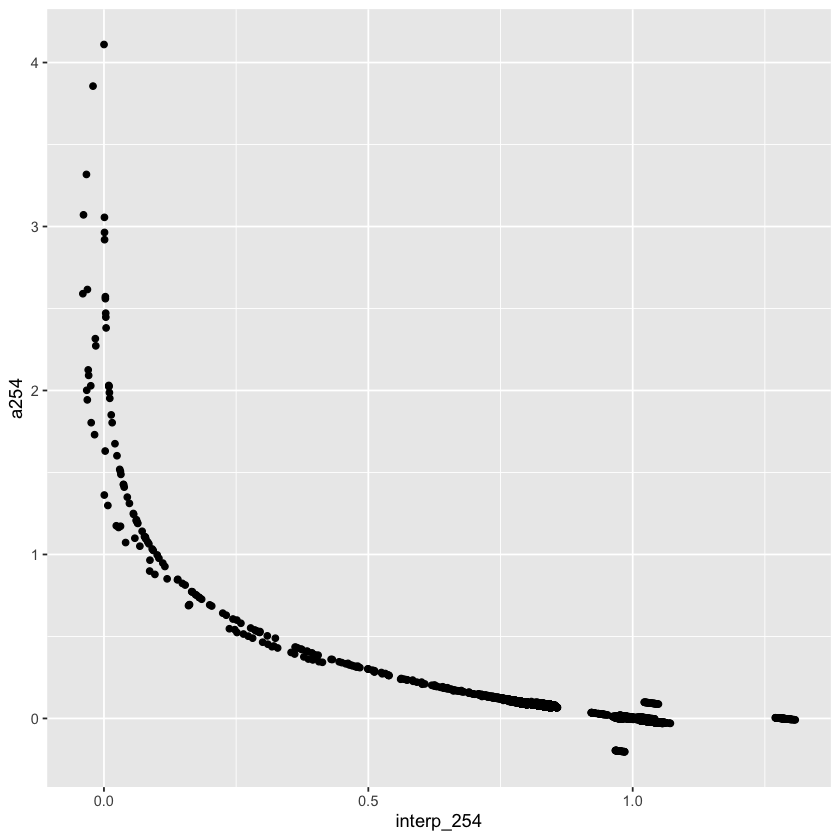

In [87]:
ggplot(suna_cols,aes(interp_254,a254))+geom_point()

summary(a254_mod)
summary(resid(a254_mod))

summary(a350_mod)
summary(resid(a350_mod))

In [91]:
suna_cols$interp_254[abs(resid(a254_mod))>0.05]<-NA
suna_cols$interp_350[abs(resid(a350_mod))>0.05]<-NA

a350_mod<-lm(a350~log10(interp_350)+I(log10(interp_350)^2)+I(log10(interp_350)^3),suna_cols)
a254_mod<-lm(a254~log10(interp_254)+I(log10(interp_254)^2)+I(log10(interp_254)^3),suna_cols)


summary(a350_mod)
summary(a254_mod)

Warning message in eval(predvars, data, env):
“NaNs produced”
Warning message in unique.default(c("AsIs", oldClass(x))):
“NaNs produced”
Warning message in unique.default(c("AsIs", oldClass(x))):
“NaNs produced”



Call:
lm(formula = a350 ~ log10(interp_350) + I(log10(interp_350)^2) + 
    I(log10(interp_350)^3), data = suna_cols)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36088 -0.00210  0.00054  0.00147  0.08631 

Coefficients:
                         Estimate Std. Error  t value Pr(>|t|)    
(Intercept)            -6.133e-04  9.192e-06   -66.71   <2e-16 ***
log10(interp_350)      -9.317e-01  6.571e-04 -1417.90   <2e-16 ***
I(log10(interp_350)^2) -2.993e-02  1.170e-03   -25.58   <2e-16 ***
I(log10(interp_350)^3) -2.406e-02  4.483e-04   -53.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.003113 on 230788 degrees of freedom
  (341 observations deleted due to missingness)
Multiple R-squared:  0.9792,	Adjusted R-squared:  0.9792 
F-statistic: 3.627e+06 on 3 and 230788 DF,  p-value: < 2.2e-16



Call:
lm(formula = a254 ~ log10(interp_254) + I(log10(interp_254)^2) + 
    I(log10(interp_254)^3), data = suna_cols)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.025131 -0.002505  0.001458  0.002091  0.040798 

Coefficients:
                         Estimate Std. Error  t value Pr(>|t|)    
(Intercept)             7.032e-03  6.513e-05  107.969   <2e-16 ***
log10(interp_254)      -8.883e-01  1.020e-03 -870.557   <2e-16 ***
I(log10(interp_254)^2)  5.115e-02  4.235e-03   12.077   <2e-16 ***
I(log10(interp_254)^3) -3.567e-03  2.125e-03   -1.678   0.0933 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.002884 on 230838 degrees of freedom
  (291 observations deleted due to missingness)
Multiple R-squared:  0.9307,	Adjusted R-squared:  0.9307 
F-statistic: 1.033e+06 on 3 and 230838 DF,  p-value: < 2.2e-16


In [ ]:
options(warn=1)


#compiled_suna2[,c(cor_cols)]<-compiled_suna2[,c(cor_cols)] %>% mutate_if(is.character,as.numeric)

for(i in 1:length(cor_cols)){
	prepdata<-data.frame(interp_350=suna_cols[,cor_cols[i]],interp_254=suna_cols[,cor_cols[i]])
	a350_pred<-predict(a350_mod,newdata=prepdata)
	a254_pred<-predict(a254_mod,newdata=prepdata)
	suna_cols[,c(paste(names(suna_cols)[cor_cols[i]],"_c350",sep=""))]<-a350_pred
	suna_cols[,c(paste(names(suna_cols)[cor_cols[i]],"_c254",sep=""))]<-a254_pred
}

options(warn=0)

# Reducing data down to 15 minutes intervals.
We want to average down each burst from the SUNA to a single value and mac sure that these values are snapped to 15 minutes intervals (e.g., rather than round up or down to 14 or 16).

In [32]:
head(suna_cols)

,suna_id,date,time,nitrate,nitrate_mgl,a254,a350,bromide_trace,spec_average_dark,dark_signal_average,⋯,interp_390_c350,interp_390_c254,interp_391_c350,interp_391_c254,interp_392_c350,interp_392_c254,interp_393_c350,interp_393_c254,interp_394_c350,interp_394_c254
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,SATSLF0826,2019008,19.50993,2.61,0.0366,0.0306,0.0114,0,20907,702,⋯,0.02911972,0.04154632,0.02926755,0.04171810,0.02980688,0.04234434,0.02957566,0.04207595,0.02986802,0.04241528
2,SATSLF0826,2019008,19.510179,2.60,0.0364,0.0308,0.0116,0,20912,702,⋯,0.02848754,0.04081113,0.02871603,0.04107697,0.02891937,0.04131343,0.02957114,0.04207070,0.02983783,0.04238025
3,SATSLF0826,2019008,19.510431,2.46,0.0345,0.0315,0.0119,0,20889,702,⋯,0.02926352,0.04171341,0.02921627,0.04165851,0.02940175,0.04187399,0.02967892,0.04219582,0.03007945,0.04266054
4,SATSLF0826,2019008,19.510679,2.55,0.0357,0.0313,0.0114,0,20903,702,⋯,0.02881315,0.04118992,0.02875822,0.04112604,0.02902418,0.04143527,0.02913880,0.04156849,0.02965675,0.04217009
5,SATSLF0826,2019008,19.510931,2.41,0.0337,0.0307,0.0109,0,20923,702,⋯,0.02831094,0.04060557,0.02876912,0.04113871,0.02887746,0.04126470,0.02927846,0.04173077,0.02947580,0.04195999
6,SATSLF0826,2019008,19.511179,2.34,0.0327,0.0305,0.0102,0,20930,702,⋯,0.02834919,0.04065010,0.02856133,0.04089698,0.02866802,0.04102111,0.02843703,0.04075234,0.02878319,0.04115507


In [93]:
#rm(compiled_suna)
#rm(compiled_suna_1)
#rm(compiled_suna_2)

suna_cols$dtpr<-lubridate::round_date(suna_cols$dtp, "15 minutes")
suna_red<-summaryBy(.~dtpr,suna_cols,FUN=c(mean))



In [ ]:
#unique(as.Date(suna_red$dtpr))

# Downloading turbidity time series data from NEON.
Data product DP1.20288.001 for general water quality sonde data.

In [95]:
LIRO_wqs<-loadByProduct(dpID="DP1.20288.001",site="LIRO",check.size=F)
saveRDS(LIRO_wqs,paste(data,"/LIRO_wqs.rds",sep=""))
LIRO_wqs<-readRDS(paste(data,"/LIRO_wqs.rds",sep=""))


Finding available files
  |======================================================================| 100%

  |======================================================================| 100%

Unpacking zip files using 1 cores.
Stacking operation across a single core.
Stacking table waq_instantaneous
Stacking table ais_maintenance
Merged the most recent publication of sensor position files for each site and saved to /stackedFiles
Copied the most recent publication of variable definition file to /stackedFiles
Finished: Stacked 2 data tables and 2 metadata tables!
Stacking took 1.242752 secs


In [96]:
LIRO_wqsd<-LIRO_wqs$waq_instantaneous
LIRO_wqsd$dtp<-LIRO_wqsd$startDateTime
LIRO_wqk<-subset(LIRO_wqsd[,c("siteID","dtp","specificConductance","dissolvedOxygen","pH","chlorophyll","turbidity","fDOM")],!is.na(LIRO_wqsd$specificConductance))
#str(LIRO_wqk)

LIRO_wqk$dtpr<-lubridate::round_date(LIRO_wqk$dtp, "15 minutes")
LIRO_wq_red<-summaryBy(.~dtpr,LIRO_wqk,FUN=c(mean))
str(LIRO_wq_red)

'data.frame':	40777 obs. of  7 variables:
 $ dtpr                    : POSIXct, format: "2017-11-10 19:30:00" "2017-11-10 19:45:00" ...
 $ specificConductance.mean: num  10.9 10.9 11 11 10.9 ...
 $ dissolvedOxygen.mean    : num  10.2 10.01 9.82 9.75 10.5 ...
 $ pH.mean                 : num  6.25 6.23 6.21 6.22 6.25 ...
 $ chlorophyll.mean        : num  1.51 1.64 1.39 1.7 1.85 ...
 $ turbidity.mean          : num  0.975 0.983 0.965 0.95 1 ...
 $ fDOM.mean               : num  NA NA NA NA NA NA NA NA NA NA ...


In [97]:
LIRO_sw<-merge(suna_red,LIRO_wq_red,by="dtpr",all.x=TRUE)


In [98]:
head(LIRO_sw)
nrow(LIRO_sw)
save

,dtpr,nitrate.mean,nitrate_mgl.mean,a254.mean,a350.mean,sensor_temp.mean,interp_189.mean,interp_190.mean,interp_191.mean,interp_192.mean,⋯,interp_393_c350.mean,interp_393_c254.mean,interp_394_c350.mean,interp_394_c254.mean,specificConductance.mean,dissolvedOxygen.mean,pH.mean,chlorophyll.mean,turbidity.mean,fDOM.mean
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-11-21 19:45:00,90.5860000,1.26880667,0.001740000,0.002853333,22.29333,0.90545554,0.9700767,0.9583832,0.8854420,⋯,-0.1032929,-0.089885348,-0.10529229,-0.091752588,NA,NA,NA,NA,NA,NA
2,2019-11-21 20:00:00,679.6540000,9.51968000,-0.001140000,-0.002020000,22.56000,1.62965296,1.8446329,0.9867218,1.1613019,⋯,-0.1056820,-0.092116607,-0.10757658,-0.093885130,NA,NA,NA,NA,NA,NA
3,2019-11-21 20:30:00,43.7506452,0.61281290,-0.001477419,0.001319355,22.66129,0.94178543,1.0920147,0.7483541,0.8452522,⋯,-0.1045917,-0.091098182,-0.10651417,-0.092893087,NA,NA,NA,NA,NA,NA
4,2019-11-21 20:45:00,-0.0225000,-0.00035000,-0.003425000,-0.001675000,22.92500,0.02098709,0.5311031,0.6253765,0.6926459,⋯,-0.1057311,-0.092162449,-0.10764253,-0.093946670,NA,NA,NA,NA,NA,NA
5,2019-11-21 21:45:00,37.7244444,0.52838333,-0.001338889,0.001152778,22.53056,0.80455392,0.6956875,0.5893872,0.6407853,⋯,-0.1044707,-0.090985156,-0.10648798,-0.092868680,NA,NA,NA,NA,NA,NA
6,2020-01-13 21:45:00,0.8310714,0.01163571,0.093442857,0.096207143,21.74643,1.36786532,1.2713747,0.9183880,0.9766666,⋯,-0.0119302,-0.003746349,-0.01207393,-0.003883073,NA,NA,NA,NA,NA,NA


[1] 11616

[1] "/Users/jhosen/gdrive/SUNA_Data//corrected_files/"

In [99]:
saveRDS(LIRO_sw,paste(save,"/SUNA_sonde_merge/","/LIRO_2020_SUNA_wq.rds",sep=""))

# import and merge NEON water quality grab sample data.

### Downloading grab sample data and saving as rds file in data folder.

In [100]:


library(zoo)
LIRO_wqg<-loadByProduct(dpID="DP1.20093.001",site="LIRO",check.size=F)
saveRDS(LIRO_wqg,paste(data,"/LIRO_wqg.rds",sep=""))
LIRO_wqg<-readRDS(paste(data,"/LIRO_wqg.rds",sep=""))



Finding available files
  |======================================================================| 100%

  |======================================================================| 100%

Unpacking zip files using 1 cores.
Stacking operation across a single core.
Stacking table swc_domainLabData
Stacking table swc_externalLabDataByAnalyte
Stacking table swc_fieldData
Stacking table swc_fieldSuperParent
Copied the most recent publication of validation file to /stackedFiles
Copied the most recent publication of categoricalCodes file to /stackedFiles
Copied the most recent publication of variable definition file to /stackedFiles
Finished: Stacked 4 data tables and 3 metadata tables!
Stacking took 0.407263 secs


### extracting lab analysis data

In [101]:
LIRO_wqg_d<-as.data.frame(LIRO_wqg$swc_externalLabDataByAnalyte)

names(LIRO_wqg_d)

uv_abs<-subset(LIRO_wqg_d,analyte=="UV Absorbance (250 nm)"|analyte=="UV Absorbance (280 nm)")
date_cast<-dcast(uv_abs[,c("analyte","collectDate","analyteConcentration")],collectDate~analyte,value.var="analyteConcentration",mean)
date_cast$dtpr<-lubridate::round_date(date_cast$collectDate, "15 minutes")

names(date_cast)

[1] "uid"                  "domainID"             "siteID"              
 [4] "namedLocation"        "sampleID"             "sampleCode"          
 [7] "startDate"            "collectDate"          "laboratoryName"      
[10] "analyte"              "analyteConcentration" "analyteUnits"        
[13] "coolerTemp"           "remarks"              "shipmentWarmQF"      
[16] "externalLabDataQF"    "sampleCondition"      "publicationDate"     
[19] "release"

[1] "collectDate"            "UV Absorbance (250 nm)" "UV Absorbance (280 nm)"
[4] "dtpr"

In [102]:

suna_grab<-merge(LIRO_sw,date_cast,by="dtpr")

#temp_nitrate_zoo<-zoo(nitrate$nitrate_umL,nitrate$dtp)
#temp_n<-na.approx(temp_nitrate_zoo,xout=suna_red$dtp,na.rm=FALSE)
#suna_grab[,c("UV Absorbance (250 nm)")]
names(suna_grab)<-gsub("UV Absorbance (250 nm)","uva_250_lab",names(suna_grab),fixed=TRUE)
names(suna_grab)<-gsub("UV Absorbance (280 nm)","uva_280_lab",names(suna_grab),fixed=TRUE)



In [ ]:
#subset(suna_red,as.Date(dtpr)==as.Date("2019-03-04"))
#as.Date(date_cast$dtpr)
#unique(as.Date(suna_red$dtpr))

#suna_grab
#LIRO_wqg_d

date_cast

# Exploring turbidity corrections

In [113]:
#names(suna_grab)
#suna_grab<-subset(suna_grab,!is.na(uva_250_lab)&!is.na(uva_280_lab)&uva_250_lab<2)
suna_grab<-subset(suna_grab,!is.na(uva_250_lab)|!is.na(uva_280_lab))
suna_grab$turbidity.mean[suna_grab$turbidity.mean<=0]<-1
suna_grab[,c("dtpr","a254.mean","uva_250_lab","uva_280_lab","interp_254_c254.mean","turbidity.mean")]

suna_grab$interp_254_log<-log10(suna_grab$interp_254_c254.mean)
suna_grab$turb_log<-log10(suna_grab$turbidity.mean)
nrow(suna_grab)
suna_grab$uva_250_lab
#suna_grab$interp_254_tcorr<-predict(lm(uva_250_lab~interp_254_c254.mean*turbidity.mean,suna_grab))
#suna_grab$interp_254_tcorr_log<-predict(lm(uva_250_lab~interp_254_log*turbidity.mean,suna_grab))
#suna_grab$interp_254_tcorr_log_turb<-predict(lm(uva_250_lab~interp_254_log*turb_log,suna_grab))


saveRDS(suna_grab,paste(save,"/SUNA_grab_merge/","/LIRO_2020_SUNA_wqg.rds",sep=""))

,dtpr,a254.mean,uva_250_lab,uva_280_lab,interp_254_c254.mean,turbidity.mean
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-06-29 16:00:00,0.08687,NaN,0.22630000,0.08934796,1.0266667
2,2020-08-03 15:45:00,0.07268,NaN,0.07406667,0.07768264,44.6566667
3,2020-09-08 15:30:00,0.08014,NaN,0.07700000,0.07850739,0.9466667
4,2020-10-05 15:45:00,0.08363,NaN,0.08053333,0.08166238,0.7433333


[1] 4

[1] NaN NaN NaN NaN

[1] "/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/SUGG_2019"

In [111]:
suna_grab<-subset(suna_grab,a254.mean<7 & a254.mean>0 & !is.na(turbidity.mean))

suna_grab$interp_254_log<-log10(suna_grab$interp_254_c254.mean)
suna_grab$turb_log<-log10(suna_grab$turbidity.mean)

#suna_grab$turb_log
summary(lm(uva_250_lab~a254.mean*turb_log,suna_grab))
#summary(lm(uva_250_lab~interp_254_c254.mean*turb_log,suna_grab))

#suna_grab$interp_254_tcorr<-predict(lm(uva_250_lab~interp_254_c254.mean*turbidity.mean,suna_grab))
#suna_grab$interp_254_tcorr_log<-predict(lm(uva_250_lab~interp_254_log*turbidity.mean,suna_grab))
#suna_grab$interp_254_tcorr_log_turb<-predict(lm(uva_250_lab~interp_254_log*turb_log,suna_grab))

suna_grab[,c("uva_250_lab","interp_254_c254.mean")]
ggplot(suna_grab,aes(a254.mean,uva_250_lab))+
#theme_ts_space+
#xlab("\nUV Absorbance at 250 nm (Laboratory)")+
#ylab("UV Absorbance at 250 nm (SUNA Uncorrected)\n")+
geom_point(size=6)



ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): 0 (non-NA) cases


In [112]:
suna_grab$interp_254_log<-log10(suna_grab$interp_254_c254.mean)
suna_grab$turb_log<-log10(suna_grab$turbidity.mean)


summary(lm(uva_250_lab~interp_254_log*turb_log,suna_grab))
summary(lm(uva_250_lab~interp_254_c254.mean*turb_log,suna_grab))

suna_grab$interp_254_tcorr<-predict(lm(uva_250_lab~interp_254_c254.mean*turbidity.mean,suna_grab))
suna_grab$interp_254_tcorr_log<-predict(lm(uva_250_lab~interp_254_log*turbidity.mean,suna_grab))
suna_grab$interp_254_tcorr_log_turb<-predict(lm(uva_250_lab~interp_254_log*turb_log,suna_grab))


ggplot(suna_grab,aes(uva_250_lab,interp_254_c254.mean,color=pH.mean))+
theme_ts_space+
xlab("\nUV Absorbance at 250 nm (Laboratory)")+
ylab("UV Absorbance at 250 nm (SUNA Uncorrected)\n")+
geom_point(size=6)

ggsave("~/neon_suna/plots/LIRO_250_uncorrected.pdf",width = 20, height = 20, units = "cm")



ggplot(suna_grab,aes(uva_250_lab,interp_254_tcorr_log,color=pH.mean))+
theme_ts_space+
geom_smooth(method="lm",color="grey20")+
xlab("\nUV Absorbance at 250 nm (Laboratory)")+
ylab("UV Absorbance at 250 nm (SUNA Corrected)\n")+
geom_point(size=6)+
ggtitle("Turbidity Corrected")

ggsave("~/neon_suna/plots/LIRO_250_corrected.pdf",width = 20, height = 20, units = "cm")



#summary(lm(uva_250_lab~interp_254_c254.mean*turbidity.mean+sensor_temp.mean,suna_grab))
#summary(lm(uva_280_lab~interp_280_c350.mean*turbidity.mean+sensor_temp.mean,suna_grab))
#summary(lm(uva_280_lab~interp_280_c254.mean*turbidity.mean+sensor_temp.mean,suna_grab))

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): 0 (non-NA) cases


In [58]:
summary(lm(uva_250_lab~interp_254_c254.mean*turb_log,suna_grab))
summary(lm(uva_250_lab~interp_254_tcorr_log*turb_log,suna_grab))



Call:
lm(formula = uva_250_lab ~ interp_254_c254.mean * turb_log, data = suna_grab)

Residuals:
         1          2          3          4          5          6          8 
-0.0062064 -0.0084420  0.0108580  0.0021620 -0.0024854  0.0002448  0.0057269 
         9 
-0.0018578 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)   
(Intercept)                    0.03864    0.00968   3.992  0.01624 * 
interp_254_c254.mean           0.90997    0.13950   6.523  0.00285 **
turb_log                       0.27487    0.15275   1.799  0.14633   
interp_254_c254.mean:turb_log -3.28998    1.77710  -1.851  0.13778   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.008289 on 4 degrees of freedom
Multiple R-squared:  0.9253,	Adjusted R-squared:  0.8693 
F-statistic: 16.52 on 3 and 4 DF,  p-value: 0.0102



Call:
lm(formula = uva_250_lab ~ interp_254_tcorr_log * turb_log, data = suna_grab)

Residuals:
         1          2          3          4          5          6          8 
-8.089e-03 -6.684e-03  1.262e-02  1.660e-04 -1.316e-03  2.030e-03  1.225e-03 
         9 
 5.038e-05 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)   
(Intercept)                   -0.0004056  0.0159783  -0.025  0.98096   
interp_254_tcorr_log           1.0038729  0.1598092   6.282  0.00328 **
turb_log                      -0.0103258  0.1986794  -0.052  0.96104   
interp_254_tcorr_log:turb_log  0.0910946  1.8013976   0.051  0.96209   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.008316 on 4 degrees of freedom
Multiple R-squared:  0.9248,	Adjusted R-squared:  0.8684 
F-statistic:  16.4 on 3 and 4 DF,  p-value: 0.01033


In [ ]:
names(LIRO_sw)

# Apply turbidity correction based on lab samples.

In [59]:
cor_cols<-grep("^interp_",names(LIRO_sw))

uva_250_turb_lm<-lm(uva_250_lab~interp_254_log*turbidity.mean,suna_grab)

for(i in 1:length(cor_cols)){
	prepdata<-data.frame(interp_254_log=log10(LIRO_sw[,cor_cols[i]]),turbidity.mean=LIRO_sw$turbidity.mean)
	turb_cor_pred<-predict(uva_250_turb_lm,newdata=prepdata)
	LIRO_sw[,c(paste(names(LIRO_sw)[cor_cols[i]],"_turb",sep=""))]<-turb_cor_pred
}



Warning message in data.frame(interp_254_log = log10(LIRO_sw[, cor_cols[i]]), turbidity.mean = LIRO_sw$turbidity.mean):
“NaNs produced”
Warning message in data.frame(interp_254_log = log10(LIRO_sw[, cor_cols[i]]), turbidity.mean = LIRO_sw$turbidity.mean):
“NaNs produced”
Warning message in data.frame(interp_254_log = log10(LIRO_sw[, cor_cols[i]]), turbidity.mean = LIRO_sw$turbidity.mean):
“NaNs produced”
Warning message in data.frame(interp_254_log = log10(LIRO_sw[, cor_cols[i]]), turbidity.mean = LIRO_sw$turbidity.mean):
“NaNs produced”
Warning message in data.frame(interp_254_log = log10(LIRO_sw[, cor_cols[i]]), turbidity.mean = LIRO_sw$turbidity.mean):
“NaNs produced”
Warning message in data.frame(interp_254_log = log10(LIRO_sw[, cor_cols[i]]), turbidity.mean = LIRO_sw$turbidity.mean):
“NaNs produced”
Warning message in data.frame(interp_254_log = log10(LIRO_sw[, cor_cols[i]]), turbidity.mean = LIRO_sw$turbidity.mean):
“NaNs produced”
Warning message in data.frame(interp_254_log = l

In [53]:
head(LIRO_sw)

,dtpr,nitrate.mean,nitrate_mgl.mean,a254.mean,a350.mean,sensor_temp.mean,interp_189.mean,interp_190.mean,interp_191.mean,interp_192.mean,⋯,interp_390_c350.mean_turb,interp_390_c254.mean_turb,interp_391_c350.mean_turb,interp_391_c254.mean_turb,interp_392_c350.mean_turb,interp_392_c254.mean_turb,interp_393_c350.mean_turb,interp_393_c254.mean_turb,interp_394_c350.mean_turb,interp_394_c254.mean_turb
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-01-08 19:30:00,2.269474,0.03177895,0.030600,0.009947368,21.59474,-17.68421,-9.2418389,0.07489879,0.8640148,⋯,0.3934182,-0.3858297,0.3779549,-0.3983568,0.3569602,-0.4153810,0.3491274,-0.4217314,0.3224715,-0.4433886
2,2019-01-08 19:45:00,2.013500,0.02820500,0.034780,0.013360000,19.40000,-12.96000,-0.7108862,1.38049450,0.2811695,⋯,0.2621142,-0.4924953,0.2498961,-0.5024702,0.2382157,-0.5120059,0.2226134,-0.5247705,0.1857241,-0.5549568
3,2019-01-08 20:00:00,1.727000,0.02417000,0.036340,0.014170000,18.77000,-1.92000,5.4961301,2.00824174,0.8098182,⋯,0.2478869,-0.5300765,0.2341478,-0.5413047,0.2144877,-0.5573934,0.2056298,-0.5646446,0.1780517,-0.5872388
4,2019-01-08 20:15:00,1.489500,0.02084500,0.037275,0.014665000,18.50500,9.12000,11.8073056,2.20082416,0.6668090,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,2019-01-08 20:30:00,1.276500,0.01789500,0.036935,0.013875000,18.39000,-8.16000,0.6518625,1.40164834,1.2685619,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,2019-01-08 20:45:00,1.112500,0.01559000,0.037460,0.014060000,18.38000,-14.88000,-4.0682822,0.65851648,0.5088470,⋯,0.2577620,-0.4815034,0.2452705,-0.4916954,0.2283832,-0.5054961,0.2161321,-0.5155081,0.1834061,-0.5422968


In [60]:
LIRO_swt_0<-LIRO_sw[,grep("*_turb$",names(LIRO_sw))]
LIRO_swt<-bind_cols(LIRO_sw[,c("dtpr","nitrate.mean","nitrate_mgl.mean","a254.mean","a350.mean","sensor_temp.mean","specificConductance.mean","dissolvedOxygen.mean","pH.mean","chlorophyll.mean","turbidity.mean","fDOM.mean")],LIRO_swt_0)





# Adding PAR data.

In [61]:
LIRO_par<-loadByProduct(dpID="DP1.20042.001",site="LIRO",check.size=F)
saveRDS(LIRO_par,paste(getwd(),"/LIRO_par.rds",sep=""))
LIRO_par<-readRDS(paste(getwd(),"/LIRO_par.rds",sep=""))




Finding available files
  |======================================================================| 100%

  |======================================================================| 100%

Unpacking zip files using 1 cores.
Stacking operation across a single core.
Stacking table PARWS_1min
Stacking table PARWS_5min
Stacking table PARWS_30min
Merged the most recent publication of sensor position files for each site and saved to /stackedFiles
Copied the most recent publication of variable definition file to /stackedFiles
Finished: Stacked 3 data tables and 2 metadata tables!
Stacking took 10.8118 secs


In [64]:
#lubridate::round_date(LIRO_parts$dtp, "15 minutes")
#getwd()
#LIRO_swt$dtpr

[1] "/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/LIRO_2019"

In [67]:

LIRO_parts<-LIRO_par$PARWS_5min
LIRO_parts$dtp<-LIRO_parts$startDateTime
#str(LIRO_wqk)



LIRO_parts$dtpr<-lubridate::round_date(LIRO_parts$dtp, "15 minutes")
LIRO_parts_red<-summaryBy(PARMean~dtpr,LIRO_parts,FUN=c(mean))
head(LIRO_parts_red)
#str(LIRO_wq_red)

LIRO_swtpar<-merge(LIRO_swt,LIRO_parts_red,by="dtpr",all.x=TRUE)



saveRDS(LIRO_swtpar,paste(save,"/SUNA_PAR/","/LIRO_SUNA_PAR.rds",sep=""))


,dtpr,PARMean.mean
,<dttm>,<dbl>
1,2017-10-11 00:00:00,NA
2,2017-10-11 00:15:00,NA
3,2017-10-11 00:30:00,NA
4,2017-10-11 00:45:00,NA
5,2017-10-11 01:00:00,NA
6,2017-10-11 01:15:00,NA


[1] 16539  1455

In [ ]:

str(LIRO_swtpar$dtpr)

attr(LIRO_swtpar$dtpr,"tzone") <- "Etc/GMT+5"

str(LIRO_swtpar$dtpr)
LIRO_swtpar$date<-as.Date(LIRO_swtpar$dtpr,tz="Etc/GMT+5")

LIRO_dates<-unique(LIRO_swtpar$date)

for(i in 1:length(LIRO_dates)){
    
    
}

In [ ]:

#LIROd<-subset(LIRO_swtpar,date==as.Date("2019-06-10"))
LIROd<-LIRO_swtpar

LIROdk<-LIROd[,grep("*c254.mean_turb$",names(LIROd))]
LIROdk$dtpr<-LIROd$dtpr

LIROdm<-subset(melt(LIROdk,id.vars=c("dtpr")),!is.na(value))
LIROdm$wavelength<-gsub("interp_","",LIROdm$variable,fixed=TRUE)
LIROdm$wavelength<-as.numeric(gsub("_c254.mean_turb","",LIROdm$wavelength,fixed=TRUE))



str(LIROdm)

# Trying some ridge plots to look at wavelength changes over time.
So far not looLIRO super great.

In [ ]:
#library(ggridges)
#scales::rescale(height)
#LIROdm$dtprn<-scales::rescale(as.numeric(LIROdm$dtpr))
#LIROdm$abs<-scales::rescale(as.numeric(LIROdm$value))


#ggplot(subset(LIROdm,wavelength>=275&wavelength<=295),aes(x = wavelength, y = dtprn, group=dtprn,height = abs)) +
#  geom_ridgeline(fill="grey80",alpha=0.6)

#ggsave("~/neon_suna/plots/LIROdm_ridge.pdf",width = 20, height = 40, units = "cm")


# Calculating spectral slope 275-295nm on each time step.

In [ ]:
names(LIROd)
names(LIROdm)

In [ ]:
ssm_275_295<-subset(LIROdm,wavelength>=275&wavelength<=295)
dtps<-unique(ssm_275_295$dtpr)
pb <- progress_bar$new(
	format = "  downloading [:bar] :percent eta: :eta",
	total = length(dtps), clear = FALSE, width= 60)
s275295_comp<-data.frame()


for(i in 1:length(dtps)){
	ssm_now<-subset(ssm_275_295,dtpr==dtps[i])
	
	ssm_now$am1<-ssm_now$value*100*2.3025851
	ssm_now$lnam1<-log(ssm_now$am1)


	if(sum(!is.na(ssm_now$lnam1))>2){
		s275295<-lm(ssm_now$lnam1~ssm_now$wavelength)$coefficients[2]*-1
		}else{s275295<-NA}
		s275295_temp<-data.frame(dtpr=dtps[i],s275295=s275295)
		s275295_comp<-bind_rows(s275295_comp,s275295_temp)
#		pb$tick()
}	
	


In [ ]:
ggplot(subset(ssm_275_295,variable=="interp_275_c254.mean_turb"),aes(dtpr,value))+geom_point()


In [ ]:
ssm_275_295<-subset(LIROdm,wavelength>=275&wavelength<=295)
dtps<-unique(ssm_275_295$dtpr)
pb <- progress_bar$new(
	format = "  downloading [:bar] :percent eta: :eta",
	total = length(dtps), clear = FALSE, width= 60)
s275295_comp<-data.frame()



	ssm_now<-subset(ssm_275_295,dtpr==dtps[i])
	
	ssm_now$am1<-ssm_now$value*100*2.3025851
	ssm_now$lnam1<-log(ssm_now$am1)


	if(sum(!is.na(ssm_now$lnam1))>2){
		s275295<-lm(ssm_now$lnam1~ssm_now$wavelength)$coefficients[2]*-1
		}else{s275295<-NA}
		s275295_temp<-data.frame(dtpr=dtps[i],s275295=s275295)
		s275295_comp<-bind_rows(s275295_comp,s275295_temp)
#		pb$tick()


In [ ]:
nrow(s275295_comp)
nrow(LIRO_swtpar)
LIRO_swtp_ss<-merge(LIRO_swtpar,s275295_comp,by="dtpr",all.x=TRUE)
saveRDS(LIRO_swtp_ss,paste(data,"LIRO_swtp_ss.rds",sep=""))

In [ ]:
sdates<-unique(as.Date(LIRO_swtp_ss$dtpr,tz="Etc/GMT+5"))

i<-5
comp_df<-data.frame()
#print(i)
start<-as.POSIXct(paste(sdates[i]-1,"22:00",tz="Etc/GMT+5"))
finish<-as.POSIXct(paste(sdates[i]+1,"03:00",tz="Etc/GMT+5"))
LIROday<-subset(LIRO_swtp_ss,dtpr>=start & dtpr<=finish)
LIROday<-subset(LIROday,!is.na(PARMean.mean) & !is.na(s275295))
nrow(LIROday)
    LIROday$PAR_roll<-as.numeric(c("NA",rollmean(LIROday$PARMean.mean,k=3,align=c("center"),na.fill=TRUE),"NA"))
    LIROday$s275295_roll<-as.numeric(c("NA",rollmean(LIROday$s275295,k=3,align=c("center"),na.fill=TRUE),"NA"))



    LIRO_night<-subset(LIROday,PARMean.mean<200)
    night_s275295<-mean(LIRO_night$s275295,na.rm=TRUE)

    
    #LIROday$baseline<-predict(lm(s275295~dtpr,LIRO_night),LIROday)
    LIROday$baseline_roll<-predict(lm(s275295_roll~dtpr,LIRO_night),LIROday)    
    LIROday$s275295_bs<-LIROday$s275295_roll-LIROday$baseline_roll    
    
    LIRO_night_am<-subset(LIRO_night,hour(dtpr)<=12)
    night_s275295_am<-mean(LIRO_night_am$s275295,na.rm=TRUE)
    
    LIRO_night_pm<-subset(LIRO_night,hour(dtpr)>12)
    night_s275295_pm<-mean(LIRO_night_pm$s275295,na.rm=TRUE)
    
    LIRO_day<-subset(LIROday,PARMean.mean>=10)
    day_s275295<-mean(LIRO_day$s275295,na.rm=TRUE)

    day_s275295_base_sum<-sum(LIRO_day$s275295_bs,na.rm=TRUE)
    day_PAR_roll_base_sum<-sum(LIRO_day$PAR_roll,na.rm=TRUE)    

    int<-lm(s275295_bs~PAR_roll,LIRO_day)$coef[1]
    slope<-lm(s275295_bs~PAR_roll,LIRO_day)$coef[2]    
    
    LIRO_n_am_time<-nrow(LIRO_night_am)
    LIRO_n_pm_time<-nrow(LIRO_night_pm)
    LIRO_d_time<-nrow(LIRO_day)
    
    temp_df<-data.frame(site="LIRO",date=sdates[i],night_s275295=night_s275295,night_s275295_am=night_s275295_am,night_s275295_pm=night_s275295_pm,day_s275295=day_s275295,day_s275295_base_sum=day_s275295_base_sum,day_PAR_roll_base_sum=day_PAR_roll_base_sum,int=int,slope=slope,LIRO_n_am_time=LIRO_n_am_time,LIRO_n_pm_time=LIRO_n_pm_time,LIRO_d_time=LIRO_d_time)

# Extracting spectral daily slope ratio discrepancy.

In [ ]:
sdates<-unique(as.Date(LIRO_swtp_ss$dtpr,tz="Etc/GMT+5"))

#i<-30
comp_df<-data.frame()
for(i in 1:length(sdates)){
#print(i)
start<-as.POSIXct(paste(sdates[i]-1,"22:00",tz="Etc/GMT+5"))
finish<-as.POSIXct(paste(sdates[i]+1,"03:00",tz="Etc/GMT+5"))
LIROday<-subset(LIRO_swtp_ss,dtpr>=start & dtpr<=finish)
LIROday<-subset(LIROday,!is.na(PARMean.mean) & !is.na(s275295))

if(nrow(LIROday)>80){
    LIROday$PAR_roll<-as.numeric(c("NA",rollmean(LIROday$PARMean.mean,k=3,align=c("center"),na.fill=TRUE),"NA"))
    LIROday$s275295_roll<-as.numeric(c("NA",rollmean(LIROday$s275295,k=3,align=c("center"),na.fill=TRUE),"NA"))



    LIRO_night<-subset(LIROday,PARMean.mean<200)
    night_s275295<-mean(LIRO_night$s275295,na.rm=TRUE)
    
    #LIROday$baseline<-predict(lm(s275295~dtpr,LIRO_night),LIROday)
    LIROday$baseline_roll<-predict(lm(s275295_roll~dtpr,LIRO_night),LIROday)    
    LIROday$s275295_bs<-LIROday$s275295_roll-LIROday$baseline_roll    
    
    LIRO_night_am<-subset(LIRO_night,hour(dtpr)<=12)
    night_s275295_am<-mean(LIRO_night_am$s275295,na.rm=TRUE)
    
    LIRO_night_pm<-subset(LIRO_night,hour(dtpr)>12)
    night_s275295_pm<-mean(LIRO_night_pm$s275295,na.rm=TRUE)
    
    LIRO_day<-subset(LIROday,PARMean.mean>=10)
    day_s275295<-mean(LIRO_day$s275295,na.rm=TRUE)

    day_s275295_base_sum<-sum(LIRO_day$s275295_bs,na.rm=TRUE)
    day_PAR_roll_base_sum<-sum(LIRO_day$PAR_roll,na.rm=TRUE)    

    int<-lm(s275295_bs~PAR_roll,LIRO_day)$coef[1]
    slope<-lm(s275295_bs~PAR_roll,LIRO_day)$coef[2]    
    
    LIRO_n_am_time<-nrow(LIRO_night_am)
    LIRO_n_pm_time<-nrow(LIRO_night_pm)
    LIRO_d_time<-nrow(LIRO_day)
    
    temp_df<-data.frame(site="LIRO",date=sdates[i],night_s275295=night_s275295,night_s275295_am=night_s275295_am,night_s275295_pm=night_s275295_pm,day_s275295=day_s275295,day_s275295_base_sum=day_s275295_base_sum,day_PAR_roll_base_sum=day_PAR_roll_base_sum,int=int,slope=slope,LIRO_n_am_time=LIRO_n_am_time,LIRO_n_pm_time=LIRO_n_pm_time,LIRO_d_time=LIRO_d_time)
    comp_df<-bind_rows(comp_df,temp_df)
    }
}




In [ ]:
nrow(comp_df)
head(comp_df)

In [ ]:
    LIRO_day$s275295_bs
ggplot(comp_df,aes(date,day_s275295_base_sum))+
       geom_point(size=2)
ggplot(comp_df,aes(date,day_PAR_roll_base_sum))+
       geom_point(size=2)


ggplot(comp_df,aes(day_PAR_roll_base_sum,day_s275295_base_sum))+
geom_point()


saveRDS(comp_df,paste(data,"comp_df_LIRO.rds",sep=""))

In [ ]:
LIROday<-subset(LIRO_swtp_ss,as.Date(dtpr,tz="Etc/GMT+5")==as.Date("2019-06-11",tz="Etc/GMT+5"))
nrow(LIROday)

str(LIROday$s275295)



ggplot(LIROday,aes(dtpr,s275295))+
geom_point()


ggplot(LIROday,aes(dtpr,PARMean.mean))+
geom_point()

ggplot(LIROday,aes(dtpr,PARMean.mean))+
geom_point()

